# Introduction
These `jupyer` notebooks can be used to generate the figures in *The ubiquity of directional and reciprocating motions in enzymes out of equilibrium* to be published by Slochower and Gilson, 2017. There are two ways to interact with this code: an interactive method and an automated method that can recreated the published figures.


# Interactive method

Assuming dihedral histograms have already been computed and the directories have been specified in `simulation.py`, it is easy to inspect the behavior of a single (or a few) dihedrals. If the histograms are unavailable, see below for instructions on how to generate them and set the paths.

For example:

## Load in standard packages for viewing and plotting the data

In [1]:
import sys as sys
import glob
import os as os
import re as re
import matplotlib as mpl
import multiprocessing as multiprocessing
import datetime as dt

In [2]:
print('Python', sys.version, end='\n\n')
for item in ('IPython.__version__', 
             'notebook.__version__',
             'numpy.__version__',
             'scipy.__version__',
             'mpl.__version__',
             'numba.__version__',
             'Cython.__version__', 
             'dask.__version__',
             'tifffile.__version__',
            ):
    module, version = item.split('.')
    try:
        lib = sys.modules[module]
    except KeyError:
        try:
            __import__(module)
        except Exception:
            continue
    print(module, getattr(lib, version))

print(multiprocessing.cpu_count(), "CPU cores")

try:
    import psutil
    print("{:.0f} GB main memory\n".format(psutil.virtual_memory()[0] / 2**30))
except ImportError:
    pass
    
print(dt.datetime.now())

Python 3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

IPython 5.1.0
notebook 5.1.0
numpy 1.11.3
scipy 1.11.3
numba 1.11.3
Cython 1.11.3
dask 1.11.3
12 CPU cores
24 GB main memory

2017-03-17 13:24:02.061758


## Load in project-specific functions

In [3]:
from simulation import *
from aesthetics import *
from plot import *

## Take advantage of the jupyter-notebook magic

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)
prepare_plot()

## Individually examine a single torsion in ADK
The two parameters required are `data_source` which specifies where the histograms are located, and `name` which is the filename of the torsion.

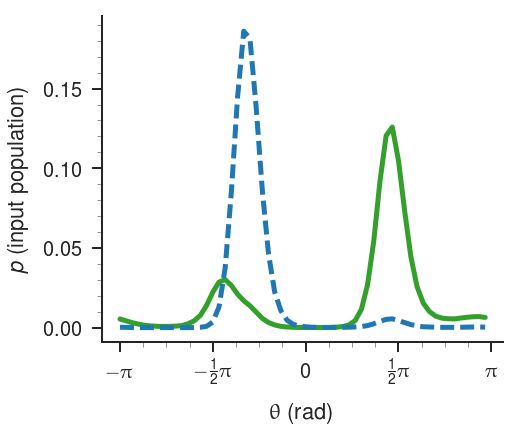

In [5]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.simulate()
plot_input(this)

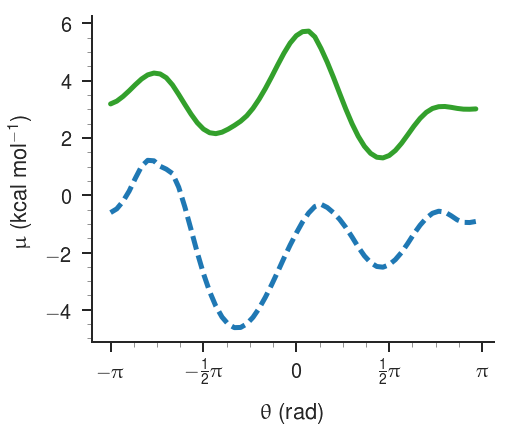

In [6]:
plot_energy(this)

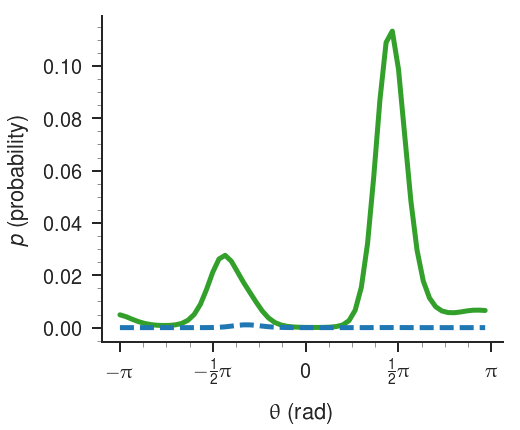

In [7]:
plot_ss(this)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.20e+00  cycle second**-1
Peak                      +2.19e-01  cycle second**-1


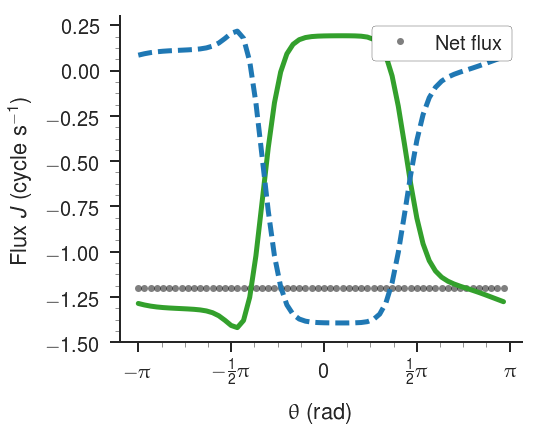

In [8]:
plot_flux(this)

## Batch method